<a href="https://colab.research.google.com/github/jeel-coder/Synapse_LP/blob/week2/Copy_of_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

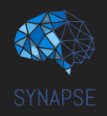

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
 !pip install shap -q  #Will be used later on

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Regression

For regression we will use the car sales dataset - https://drive.google.com/file/d/1dtwer8INIz05mULkV5yk8-Fzk2r3K1Of/view?usp=sharing

#### Basic EDA

Import dataset

In [ ]:
df= pd.read_csv('/Car_details (1).csv')

##### Do .head, .info and .describe in the subsequent cells

In [ ]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Plot a bar chart for the year, fuel and transmission columns

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
year=pd.DataFrame(df['year'].value_counts())
year.head()


count
year       
2017   1018
2016    859
2018    807
2015    776
2013    670

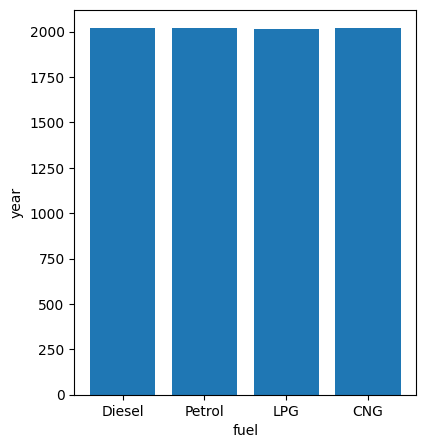

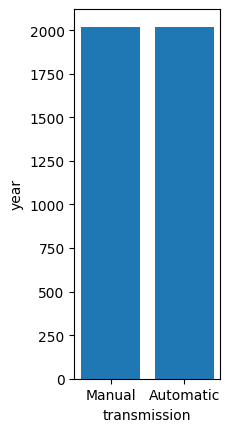

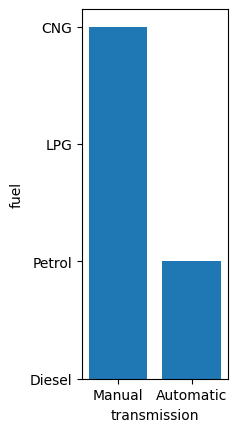

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(df['fuel'],df['year'])
plt.xlabel('fuel')
plt.ylabel('year')
plt.show()

plt.subplot(1,3,2)
plt.bar(df['transmission'],df['year'])
plt.xlabel('transmission')
plt.ylabel('year')
plt.show()

plt.subplot(1,3,3)
plt.bar(df['transmission'],df['fuel'])
plt.xlabel('transmission')
plt.ylabel('fuel')
plt.show()
plt.tight_layout()
plt.show()

##### Plot a pie chart for the owner and seats column

In [ ]:
#df_seat=df.dropna(axis='index',how='any')
#df_seat

In [ ]:
nan_counts = df.isna().sum()
nan_counts

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
df_owner=df['owner'].value_counts()
df_owner=pd.DataFrame(df_owner)
df_owner

count
owner                      
First Owner            5289
Second Owner           2105
Third Owner             555
Fourth & Above Owner    174
Test Drive Car            5

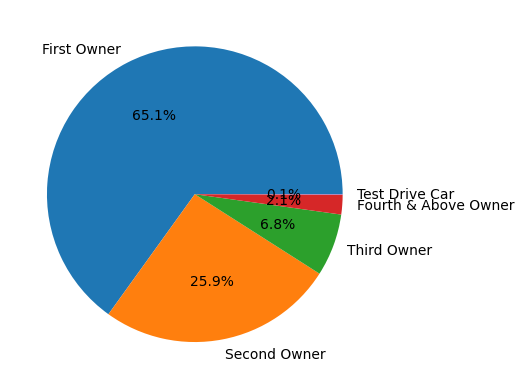

In [ ]:
plt.pie(df_owner['count'], labels=df_owner.index, autopct='%0.1f%%')
plt.show()


##### Make a KDE plot to represent the engine column

##### Since the engine column is of type object you'll need to convert it to float and round it to the nearest 10 place as it would be easier to count and plot


In [ ]:
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

<ipython-input-312-4cf8ac6df9aa>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['engine'], shade=True)# why values doubt


Text(0, 0.5, 'Density')

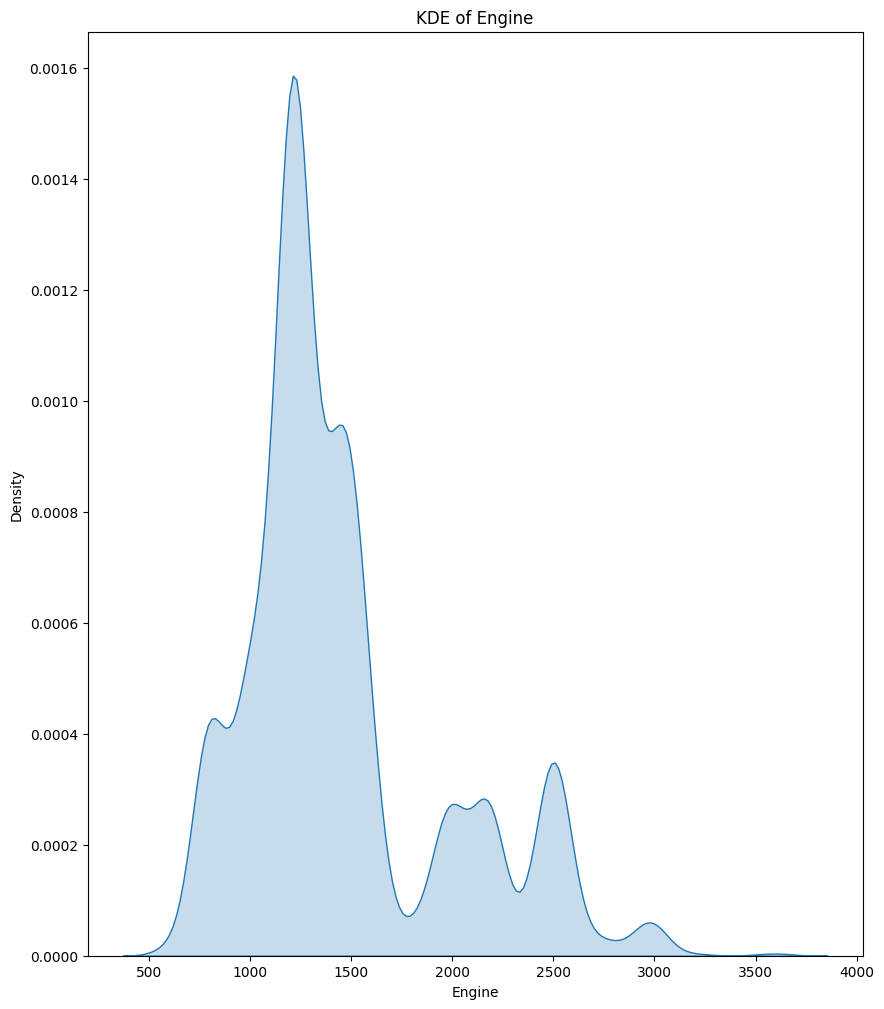

In [ ]:
# code here
df['engine'] = df['engine'].str.replace(r'\D', '', regex=True).astype(float).round(10)
  #The \D matches any character that is not a digit (equivalent to [^0-9])
plt.figure(figsize=(10,12))
sns.kdeplot(df['engine'], shade=True)# why values doubt
plt.title('KDE of Engine')
plt.xlabel('Engine')
plt.ylabel('Density')
# code ends

Plot the graph

##### Also make a countplot for the Engine column
hint: sns.countplot

In [ ]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage  engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248.0      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498.0  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497.0      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396.0      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298.0    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

<Axes: xlabel='engine', ylabel='count'>

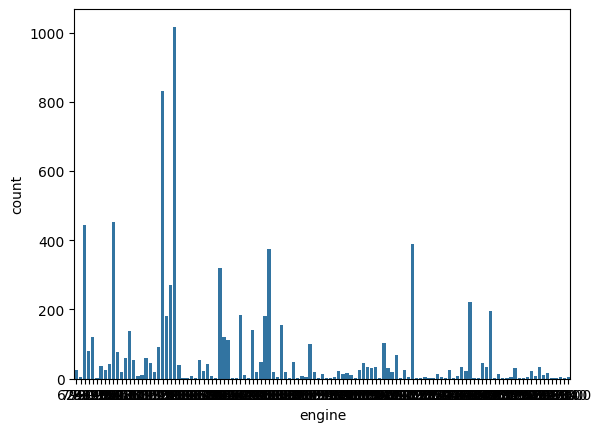

In [ ]:
#plot here
sns.countplot(x=df['engine'])

##### As you can see in the Name column the entire name of the car is given, it will be very difficut to perfrom EDA and feed in this column into our Regression model so we will just extract the car manufacturer's name and create a new column Brand

In [ ]:
# code here
df['Brand'] = df['name'].str.split().str[0]
df.head()
# code ends

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage  engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248.0      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498.0  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497.0      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396.0      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298.0    88.2 bhp   

                     torque  seats    Brand  
0            190Nm@ 2000rpm    5.0   Maruti  
1       250Nm@ 1500-2500rpm    5.0    Skoda  
2     12.7@ 2,700(kgm@ rpm)    5.0    Honda  
3  22.4 kgm at 1750-2750rpm    5.0  Hyundai  
4     11.5@ 4,500(kgm@ rpm)    5.0   Maruti

##### Plot a bar graph for the new column brand

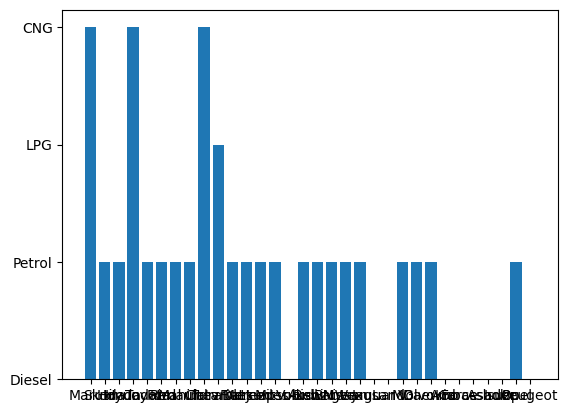

In [ ]:
#plot here

plt.bar(df['Brand'],df['fuel'])
plt.show()

#### Perform a simiar process as Engine column for the Mileage column, extract the mileage number convert it to float and round it to the nearest 1's place

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  Brand          8128 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [ ]:
# code here
df['mileage']=df['mileage'].str.replace(r'\D', '', regex=True).astype(float).round(10)
df.head()
# code ends

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine   max_power  \
0  Individual       Manual   First Owner    234.0  1248.0      74 bhp   
1  Individual       Manual  Second Owner   2114.0  1498.0  103.52 bhp   
2  Individual       Manual   Third Owner    177.0  1497.0      78 bhp   
3  Individual       Manual   First Owner    230.0  1396.0      90 bhp   
4  Individual       Manual   First Owner    161.0  1298.0    88.2 bhp   

                     torque  seats    Brand  
0            190Nm@ 2000rpm    5.0   Maruti  
1       250Nm@ 1500-2500rpm    5.0    Skoda  
2     12.7@ 2,700(kgm@ rpm)    5.0    Honda  
3  22.4 kgm at 1750-2750rpm    5.0  Hyundai  
4     11.5@ 4,500(kgm@ rpm)    5.0   Maruti

<Axes: xlabel='mileage', ylabel='count'>

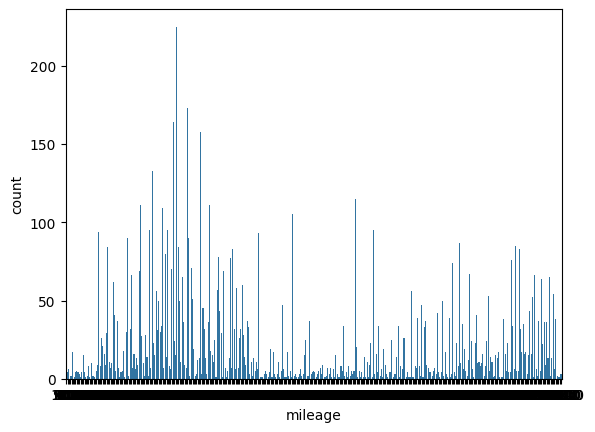

In [ ]:
#plot the count of each mileage value
# code here
sns.countplot(x=df['mileage'])

#### If you want to do more analysis and make some graphs you are more than welcome :)

## What do you infer from the above analysis

### Answer Here

### Now let's prep our data to perform Regression to predict the Selling Price

##### As you can see the column max_power is of type object, we need to extract the max_power similar to Engine and Mileage columns

Be careful of NaN values in this part of the code, perform df.info() to look how many Nan value are present, you might face diffculties when you are trying to convert object to float in Nan values are present

In [ ]:
# code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  Brand          8128 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 889.1+ KB


In [ ]:
## code end
#df['max_power']=map(lambda x:x.split(' ').str[0],df['max_power'])
#df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')
#df['max_power']=df['max_power'].astype(float)
#df['max_power']=df['max_power'].iloc[:-3]
#df['max_power'] = df['max_power'].str.replace(r'[^A-Za-z]', '', regex=True).astype(dtype=float)
#df.head()

In [ ]:
#df['max_power']=df['max_power'].astype(str)
#df['max_power']=df['max_power'].str.replace(' bhp','').astype(float)


In [ ]:
#df['max_power']=df['max_power'].str.replace(r'\D', '', regex=True).astype(float).round(10)
#df.head()

In [ ]:
df['max_power']=df['max_power'].str.rstrip(' bhp')
df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')
df['max_power'] = df['max_power'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  Brand          8128 non-null   int64  
 14  age            8128 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 952.6+ KB


##### The year column contains the year the car was manufactured, but this data won't be directly useful to us
##### Use the current year to calculate the age of the car

In [ ]:
# code here
df['age']=2024-df['year']
df.head()
# drop the columns year and name

name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500     1   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     1   
2      Honda City 2017-2020 EXi  2006         158000     140000     3   
3     Hyundai i20 Sportz Diesel  2010         225000     127000     1   
4        Maruti Swift VXI BSIII  2007         130000     120000     3   

   seller_type  transmission  owner  mileage  engine  max_power  \
0            1             1      0    234.0  1248.0      74.00   
1            1             1      2   2114.0  1498.0     103.52   
2            1             1      4    177.0  1497.0      78.00   
3            1             1      0    230.0  1396.0      90.00   
4            1             1      0    161.0  1298.0      88.20   

                     torque  seats  Brand  age  
0            190Nm@ 2000rpm    5.0     20   10  
1       250Nm@ 1500-2500rpm    5.0     27   10  
2     12.7@ 2,700(kgm@ rpm)    5.0     10   18  
3  22.4 kgm at 1750-2750rpm    5.0     11   14  
4     11.5@ 4,500(kgm@ rpm)    5.0     20   17

##### A few of the columns are still of dtype object, now we will be using Laber Encoder to encode these columns

##### Import LaberEncoder from sklearn

In [ ]:
# import here
from sklearn.preprocessing import LabelEncoder
#label encode the colums = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
# code here
# code ends
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'Brand']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


Do df.head() to see how your dataframe looks like after LabelEncoding

In [ ]:
df.head()

name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500     1   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     1   
2      Honda City 2017-2020 EXi  2006         158000     140000     3   
3     Hyundai i20 Sportz Diesel  2010         225000     127000     1   
4        Maruti Swift VXI BSIII  2007         130000     120000     3   

   seller_type  transmission  owner  mileage  engine  max_power  \
0            1             1      0    234.0  1248.0      74.00   
1            1             1      2   2114.0  1498.0     103.52   
2            1             1      4    177.0  1497.0      78.00   
3            1             1      0    230.0  1396.0      90.00   
4            1             1      0    161.0  1298.0      88.20   

                     torque  seats  Brand  age  
0            190Nm@ 2000rpm    5.0     20   10  
1       250Nm@ 1500-2500rpm    5.0     27   10  
2     12.7@ 2,700(kgm@ rpm)    5.0     10   18  
3  22.4 kgm at 1750-2750rpm    5.0     11   14  
4     11.5@ 4,500(kgm@ rpm)    5.0     20   17

##### The reason behind standardization and normalization will be explained in the later part of the task

##### For now we need to Normalize somem specific coloums
##### Import MinMaxScaler from sklearn and normalize the coloums - ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']

In [ ]:
# import here
from sklearn.preprocessing import MinMaxScaler
c=['km_driven', 'mileage', 'engine', 'seats', 'age', 'selling_price','max_power']
# code here
norm=MinMaxScaler()
df[c]=pd.DataFrame(norm.fit_transform(df[c]),columns=c)
df.head()
#code ends

name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014       0.042126   0.061640     1   
1  Skoda Rapid 1.5 TDI Ambition  2014       0.034102   0.050837     1   
2      Honda City 2017-2020 EXi  2006       0.012839   0.059310     3   
3     Hyundai i20 Sportz Diesel  2010       0.019559   0.053803     1   
4        Maruti Swift VXI BSIII  2007       0.010030   0.050837     3   

   seller_type  transmission  owner   mileage    engine  max_power  \
0            1             1      0  0.069976  0.209396     0.1850   
1            1             1      2  0.632177  0.293289     0.2588   
2            1             1      4  0.052931  0.292953     0.1950   
3            1             1      0  0.068780  0.259060     0.2250   
4            1             1      0  0.048146  0.226174     0.2205   

                     torque  seats  Brand       age  
0            190Nm@ 2000rpm   0.25     20  0.162162  
1       250Nm@ 1500-2500rpm   0.25     27  0.162162  
2     12.7@ 2,700(kgm@ rpm)   0.25     10  0.378378  
3  22.4 kgm at 1750-2750rpm   0.25     11  0.270270  
4     11.5@ 4,500(kgm@ rpm)   0.25     20  0.351351

In [ ]:
# Fill NaN values in the dataset
df.fillna(df[c].mean(), inplace=True)
df.head()

name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014       0.042126   0.061640     1   
1  Skoda Rapid 1.5 TDI Ambition  2014       0.034102   0.050837     1   
2      Honda City 2017-2020 EXi  2006       0.012839   0.059310     3   
3     Hyundai i20 Sportz Diesel  2010       0.019559   0.053803     1   
4        Maruti Swift VXI BSIII  2007       0.010030   0.050837     3   

   seller_type  transmission  owner   mileage    engine  max_power  \
0            1             1      0  0.069976  0.209396     0.1850   
1            1             1      2  0.632177  0.293289     0.2588   
2            1             1      4  0.052931  0.292953     0.1950   
3            1             1      0  0.068780  0.259060     0.2250   
4            1             1      0  0.048146  0.226174     0.2205   

                     torque  seats  Brand       age  
0            190Nm@ 2000rpm   0.25     20  0.162162  
1       250Nm@ 1500-2500rpm   0.25     27  0.162162  
2     12.7@ 2,700(kgm@ rpm)   0.25     10  0.378378  
3  22.4 kgm at 1750-2750rpm   0.25     11  0.270270  
4     11.5@ 4,500(kgm@ rpm)   0.25     20  0.351351

In [ ]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           222
seats              0
Brand              0
age                0
dtype: int64

As mentioned above, the 'selling_price' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'selling_price') and one which only contains the column 'selling_price'. Name them X and y respectively.

In [ ]:
# Seperate the Dataframe into X and y
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X= pd.DataFrame(df.drop(columns=['selling_price','name','torque','year']))
y = df['selling_price']
print(X[:])
print(X.shape)
print(y[:])
print(y.shape)

      km_driven  fuel  seller_type  transmission  owner   mileage    engine  \
0      0.061640     1            1             1      0  0.069976  0.209396   
1      0.050837     1            1             1      2  0.632177  0.293289   
2      0.059310     3            1             1      4  0.052931  0.292953   
3      0.053803     1            1             1      0  0.068780  0.259060   
4      0.050837     3            1             1      0  0.048146  0.226174   
...         ...   ...          ...           ...    ...       ...       ...   
8123   0.046601     3            1             1      0  0.055323  0.192282   
8124   0.050414     1            1             1      1  0.050239  0.291611   
8125   0.050837     1            1             1      0  0.057715  0.209396   
8126   0.010591     1            1             1      0  0.704844  0.259060   
8127   0.010591     1            1             1      0  0.704844  0.259060   

      max_power  seats  Brand       age  
0      0.

### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# import here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5689, 11) (2439, 11) (5689,) (2439,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [ ]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# perform linear regression
regressor = LinearRegression()
# create an instance of LinearRegression

In [ ]:
# fit the model on the training data, hint: use the fit method
regressor.fit(X_train,y_train)

LinearRegression()

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be (22009,) if everything is correct. Yeh line confirm karna hai

In [ ]:
# make predictions on the test data
y_pred =regressor.predict(X_test)
y_pred.size

2439

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
# calculate the mean squared error
mse =mean_squared_error(y_test,y_pred)

### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

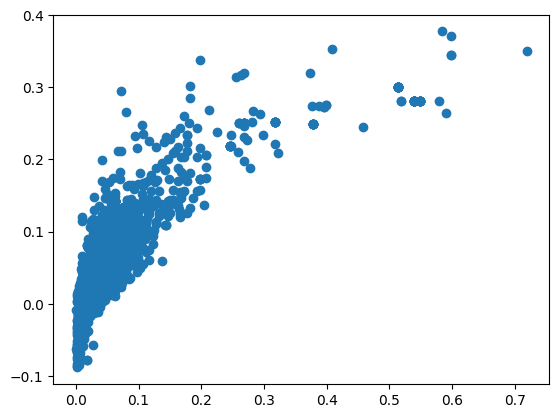

In [ ]:
#plot here
plt.scatter(y_test,y_pred)
plt.show()

# Now let's start the fun part :)

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [401]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
        self.learning_rate =learning_rate

        self.iterations =iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n =X.shape

        # what does self.m and self.n represent and why are they calculated?self.m is the number of training examples (rows in X)#self.n is the number of features (columns in X).

        # weight initialization
        self.W = np.zeros(self.n)

        self.b =0 # set this equal to 0

        self.X =X  # set this equal to X

        self.Y =Y # set this equal to Y


        # gradient descent learning#used to minimize a loss function
        for i in range(self.iterations) : # complete the range function

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self) :

        Y_pred = np.dot(self.X, self.W) + self.b# complete this line

        # calculate gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # write the code to update the weights

        return self


    def predict(self,X) :

        return np.dot(X, self.W) + self.b


In [399]:
X.shape

(1000, 10)

In [403]:
model = LinearRegression( iterations = 10000, learning_rate = 0.0001 )

model.fit(X,y) # Explain in your own words what the fit function does fit function helps to study our input data by giving x=features y=target variable

#### Answer Here

In [405]:
y_pred = model.predict(X_test) # code here

In [408]:
# Calculate the mean squared error
mse=mean_squared_error(y_test,y_pred)
mse

0.5266666666666666

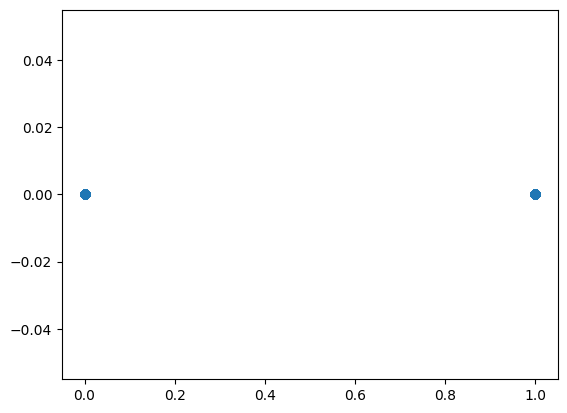

In [409]:
# plot a similar scatter plot as above
plt.scatter(y_test,y_pred)
plt.show()

## Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JEEL/classified_data (1).txt',index_col=0)
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

#### Basic EDA

##### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe()

WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0.299476     0.365157     0.639693   
25%       0.761064     0.784407     0.866306     0.934340     1.222623   
50%       0.941502     0.945333     1.065500     1.165556     1.375368   
75%       1.123060     1.134852     1.283156     1.383173     1.504832   
max       1.666902     1.713342     1.785420     1.885690     1.893950   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
##### Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
##### Refer seaborn boxplot() documentation

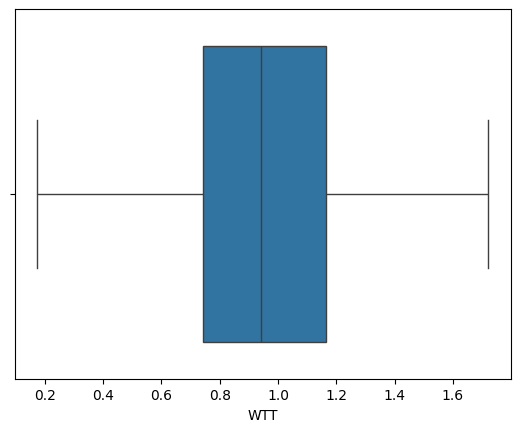

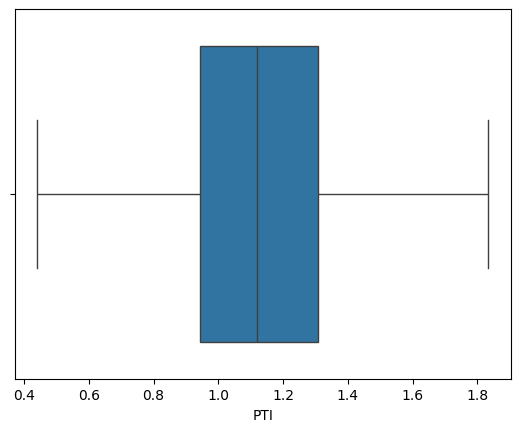

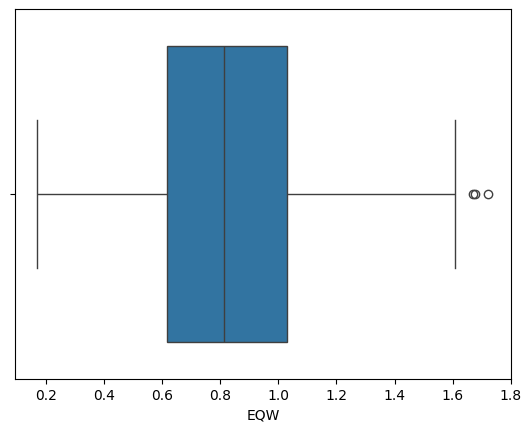

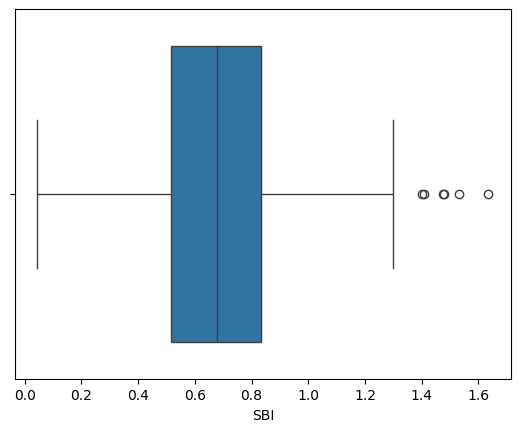

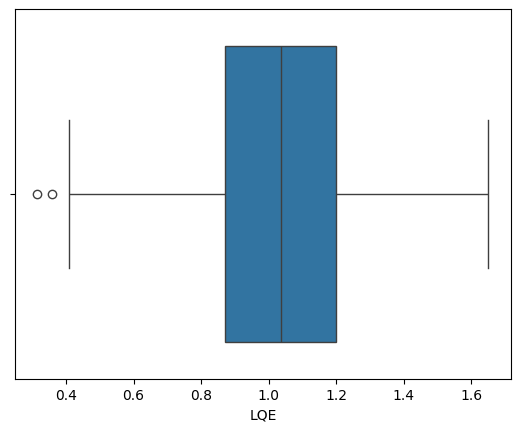

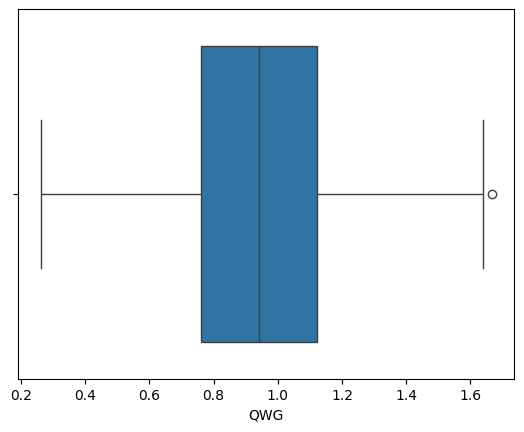

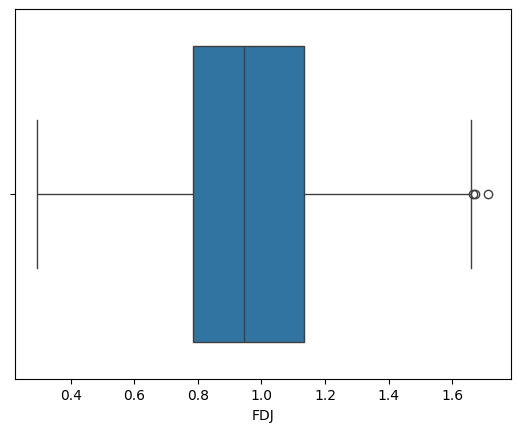

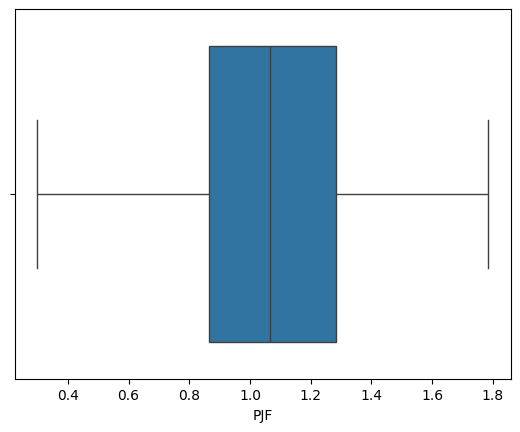

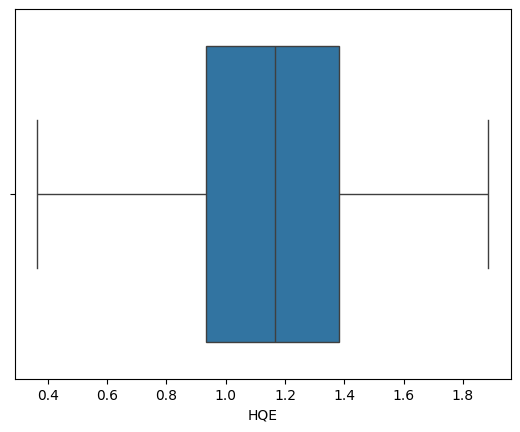

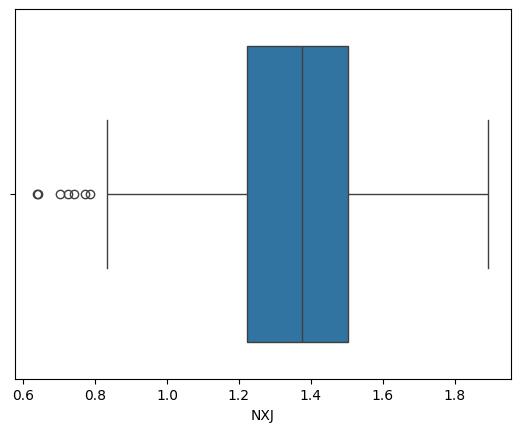

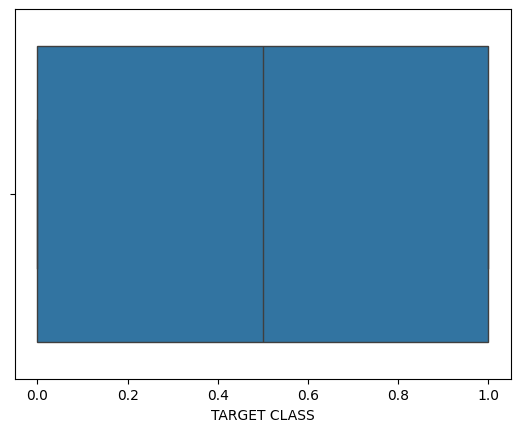

In [ ]:
#plot
for i in df:
   sns.boxplot(x=df[i],data=df)
   plt.show()

##### What conclusion, if any can you draw from these boxplots?
List them down below.for target variable we have no outliers

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

##### **import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# your code ends here

##### **Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
##### Hint: scaler.fit() and scaler.transform()

In [ ]:
# your code starts here
X=df.drop(columns='TARGET CLASS')
y=df['TARGET CLASS']
scaler.fit(X)

# your code ends here

StandardScaler()

In [ ]:
col='WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ'
df_feat=pd.DataFrame(scaler.transform(X),columns=col)
df_feat.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# your code starts here
# your code ends here

### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
X,y = df_feat.values[:,:],df.values[:,-1]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=42)
# Your code ends here

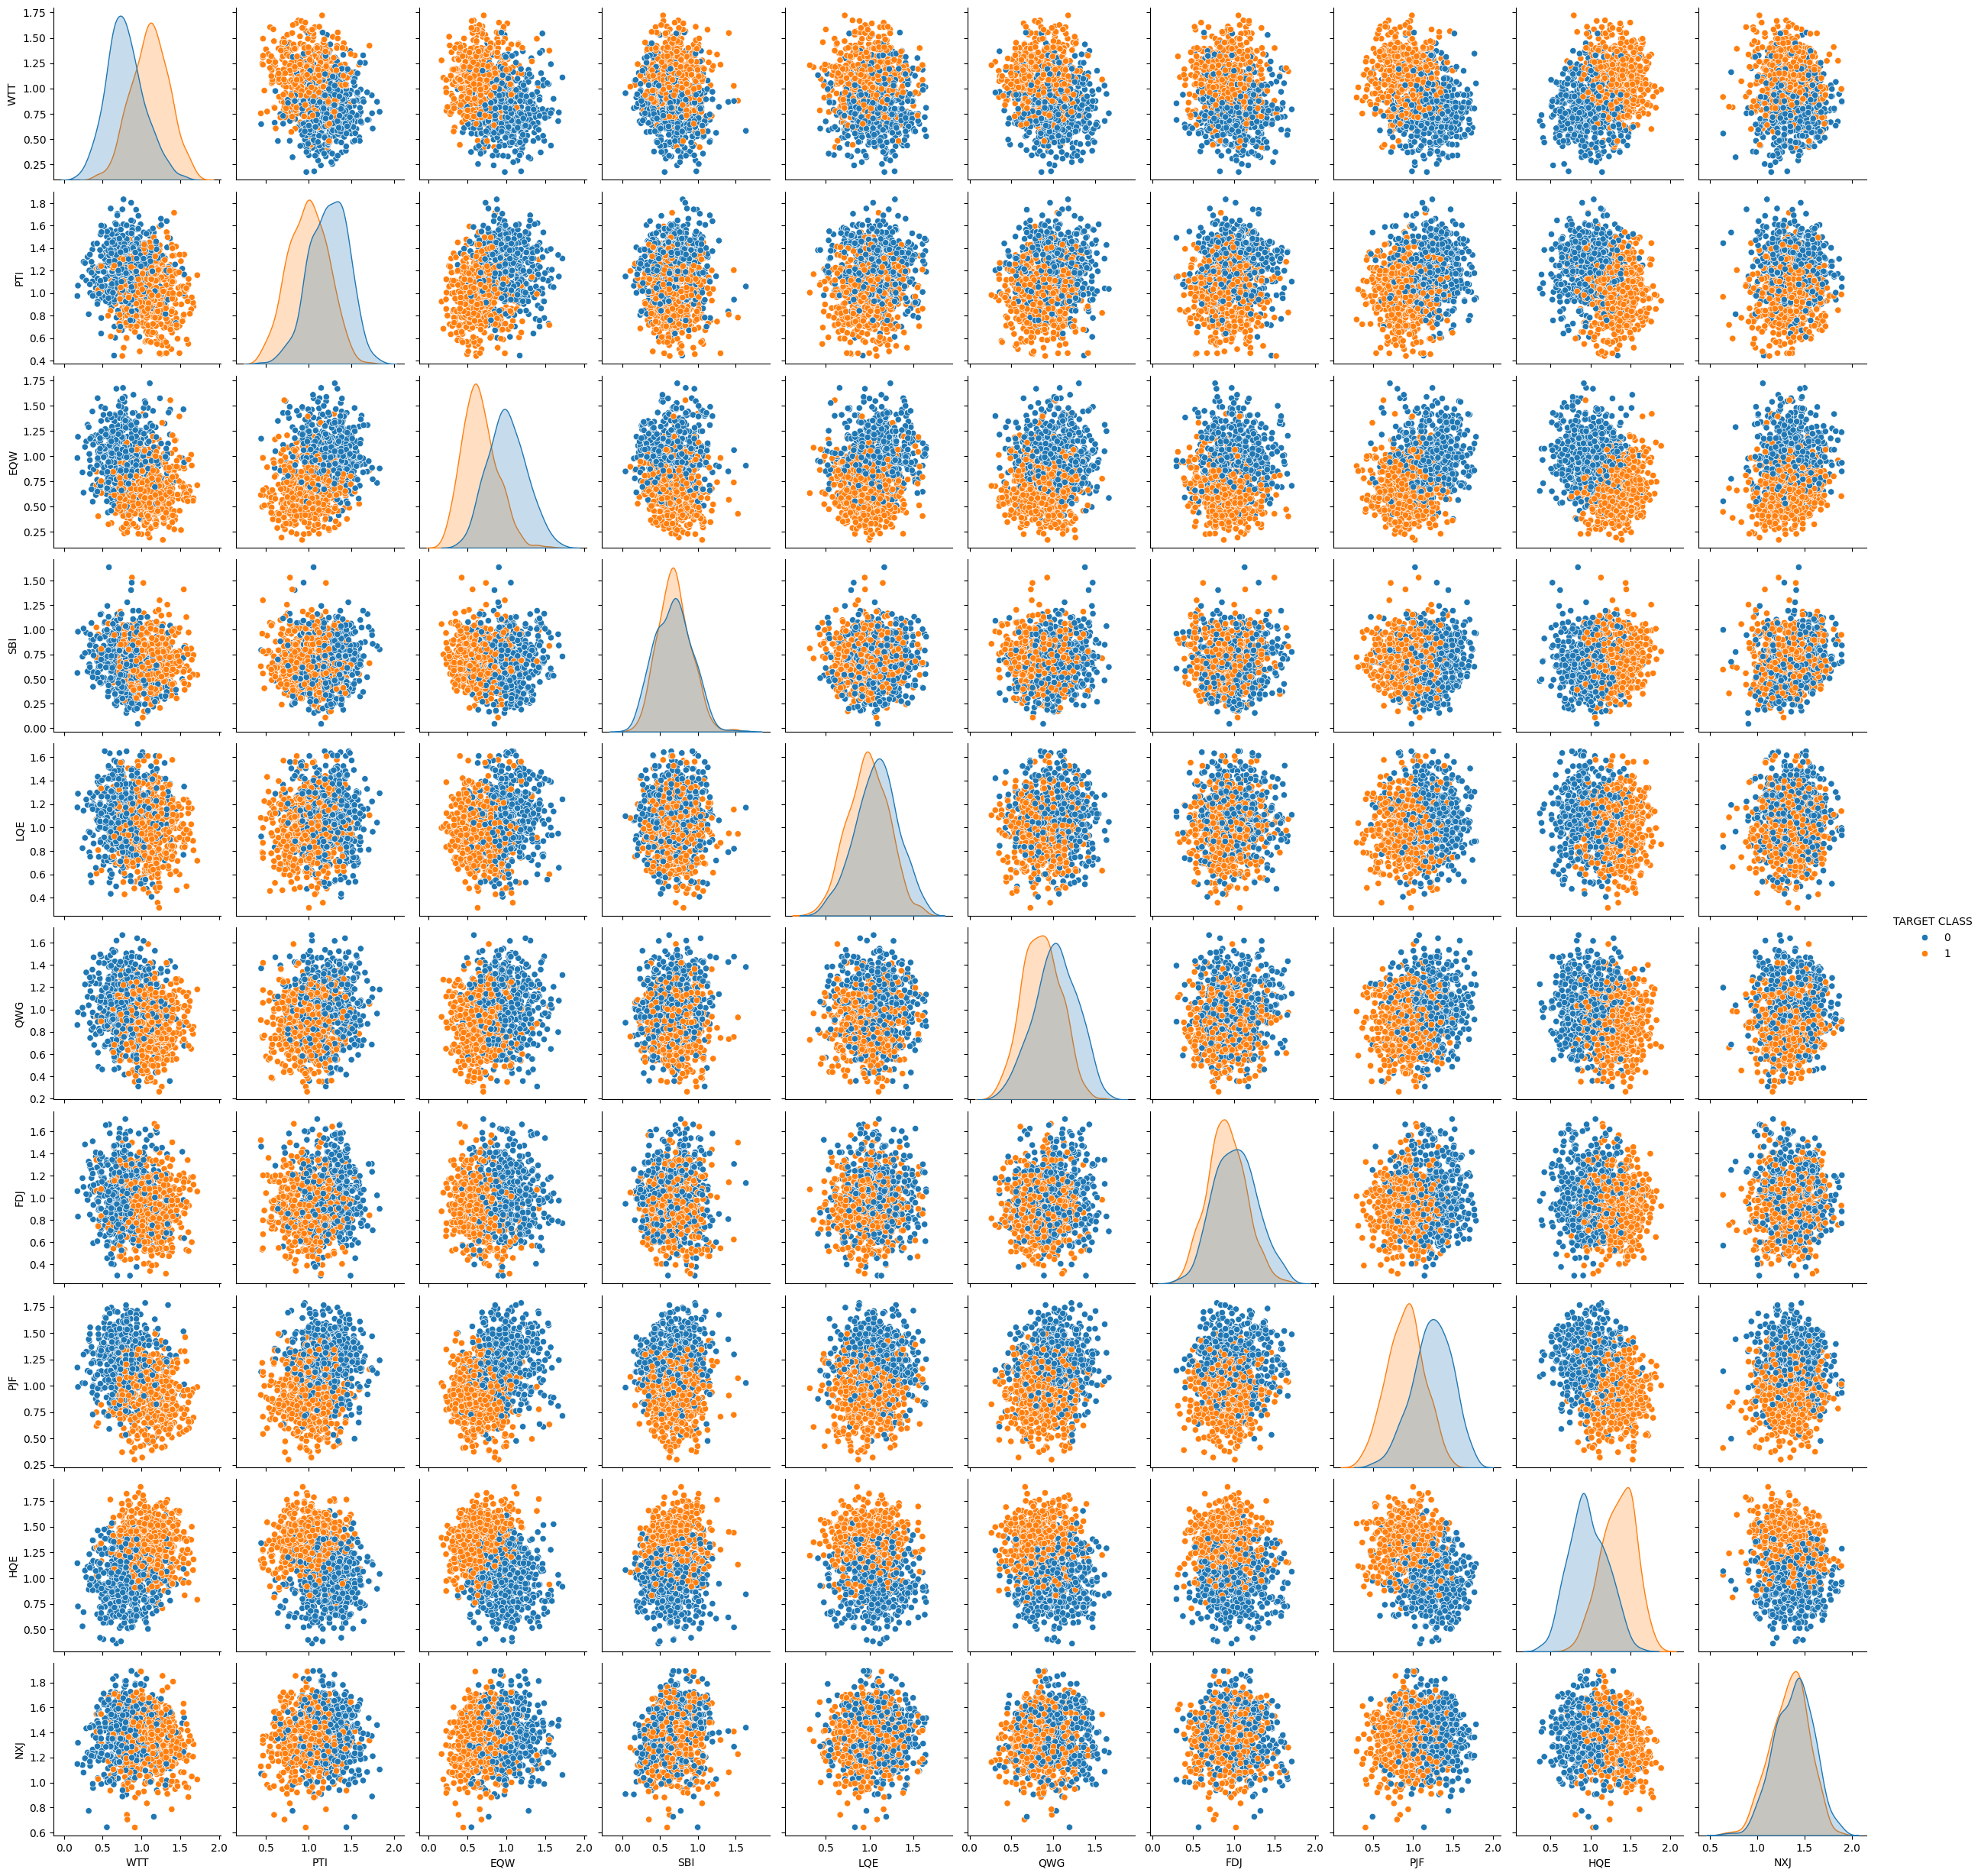

In [ ]:
sns.pairplot(df,hue='TARGET CLASS')

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# Your code starts here.
pred= knn.predict(X_test)
pred
# Your code ends here

array([0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0.

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# Your code starts here.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(confusion_matrix(y_test,pred))
# Your code ends here

[[134   8]
 [ 11 147]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       142
         1.0       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here.
from sklearn.metrics import accuracy_score
accuracy_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())
# Your code ends here

In [ ]:
accuracy_rate

[0.9109999999999999,
 0.909,
 0.9280000000000002,
 0.9339999999999999,
 0.9289999999999999,
 0.929,
 0.9310000000000003,
 0.9340000000000002,
 0.9289999999999999,
 0.9350000000000002,
 0.9329999999999998,
 0.9350000000000002,
 0.937,
 0.9410000000000001,
 0.9390000000000001,
 0.9390000000000001,
 0.9349999999999999,
 0.9360000000000002,
 0.9360000000000002,
 0.9360000000000002,
 0.9339999999999999,
 0.9359999999999999,
 0.93,
 0.933,
 0.9349999999999999,
 0.937,
 0.9380000000000001,
 0.938,
 0.937,
 0.9390000000000001,
 0.9360000000000002,
 0.943,
 0.937,
 0.9390000000000001,
 0.9390000000000001,
 0.9400000000000001,
 0.9369999999999999,
 0.943,
 0.9410000000000001]

##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
accuracy_lst = {}
for i in range(1,60):
  knn =KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i =knn.predict(X_test)

  accuracy_lst[i]= accuracy_score(y_test,pred_i)

# Your code ends here

In [ ]:
accuracy_lst

{1: 0.9366666666666666,
 2: 0.9166666666666666,
 3: 0.9433333333333334,
 4: 0.9433333333333334,
 5: 0.9433333333333334,
 6: 0.9433333333333334,
 7: 0.9366666666666666,
 8: 0.9433333333333334,
 9: 0.9433333333333334,
 10: 0.95,
 11: 0.95,
 12: 0.9533333333333334,
 13: 0.9533333333333334,
 14: 0.9533333333333334,
 15: 0.9533333333333334,
 16: 0.9533333333333334,
 17: 0.9533333333333334,
 18: 0.95,
 19: 0.9466666666666667,
 20: 0.9466666666666667,
 21: 0.95,
 22: 0.9433333333333334,
 23: 0.9433333333333334,
 24: 0.9466666666666667,
 25: 0.94,
 26: 0.9433333333333334,
 27: 0.9466666666666667,
 28: 0.9466666666666667,
 29: 0.95,
 30: 0.95,
 31: 0.95,
 32: 0.95,
 33: 0.95,
 34: 0.95,
 35: 0.95,
 36: 0.95,
 37: 0.95,
 38: 0.95,
 39: 0.95,
 40: 0.95,
 41: 0.95,
 42: 0.95,
 43: 0.95,
 44: 0.95,
 45: 0.95,
 46: 0.95,
 47: 0.95,
 48: 0.95,
 49: 0.95,
 50: 0.95,
 51: 0.95,
 52: 0.95,
 53: 0.95,
 54: 0.95,
 55: 0.95,
 56: 0.95,
 57: 0.95,
 58: 0.95,
 59: 0.95}

##### **Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy')

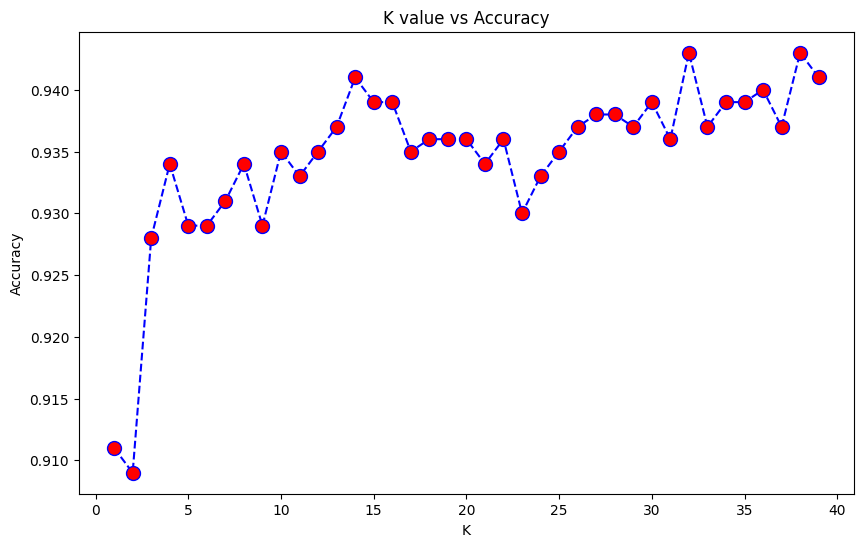

In [ ]:
# Your code starts here
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('K value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
# Your code ends here

In [ ]:
print(len(X), len(y))


1000 1000


In [ ]:
X.shape

(1000, 10)

In [ ]:
y.shape

(1000,)

ValueError: x and y must have same first dimension, but have shapes (39,) and (59,)

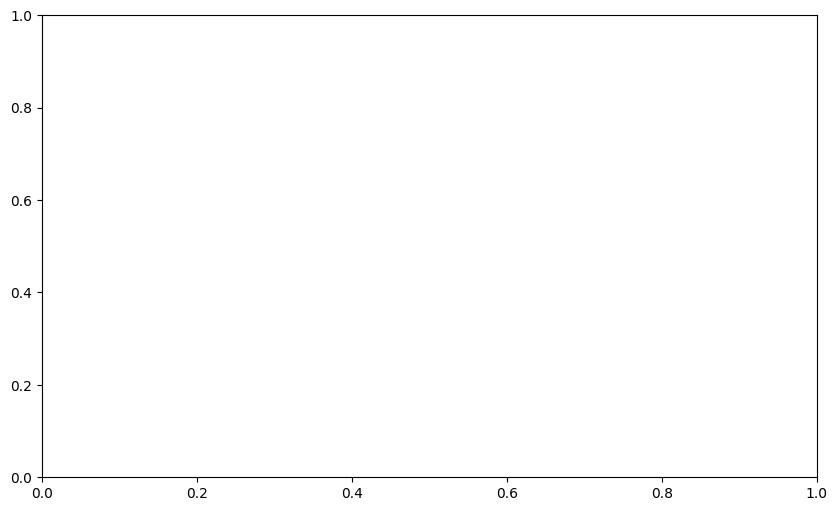

In [410]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_lst.values(),color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('K value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [385]:
# Your code starts here.
n_acc_best =0.953
n_neigh_best = 32
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 32
Corresponding highest accuracy: 0.953


### OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [386]:
!pip install shap

In [387]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

In [388]:
import shap

In [389]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [411]:
#Run this code as it is
ex = KernelExplainer(regressor.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:],matplotlib=True)

Provided model function fails when applied to the provided data set.


ValueError: X has 10 features, but LinearRegression is expecting 11 features as input.

##### Plotting the same information in a different way

In [392]:
explainer_ebm = shap.Explainer(regressor.predict,sample(X_train, 10))
shap_values_ebm = explainer_ebm(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but LinearRegression is expecting 11 features as input.

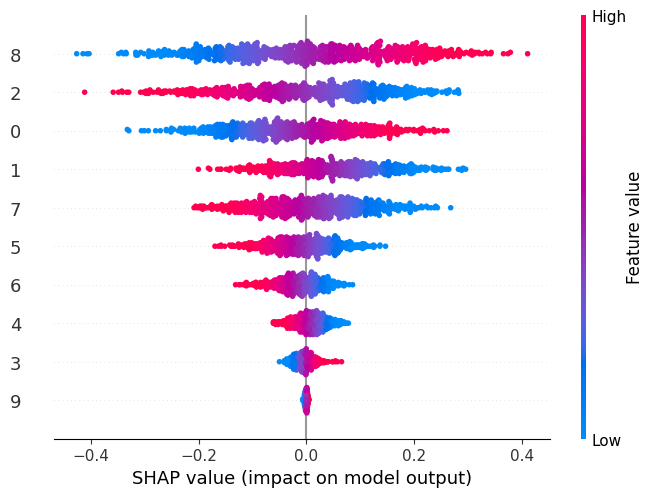

In [393]:
shap.plots.beeswarm(shap_values_ebm)

#### Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

RESEARCH TASK:


A)Logistic Regression

https://ryxcommar.com/2020/06/27/why-do-so-many-practicing-data-scientists-not-understand-logistic-regression/

B) Read the above article and write you understand


What is a logit, probit?
logit is a function opposte to logistic function

C) Difference between logistic regression and classification
logistic regression gives the probabilty for occurence of an event it doesn.t really classify the two odd of scenario ad zero or one.But we can do this by appyling condition to the probalities prooduced by logistic regression.

End of Task

©DJS Synapse 2024 - 2025